In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import savgol_filter
from gekko import GEKKO
import matplotlib

matplotlib.rcParams.update(matplotlib.rcParamsDefault)

matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Palatino",
    "font.size": 32,
    "legend.fontsize": 20,
    'legend.title_fontsize': 24,

    #"axes.formatter.use_mathtext": True
})

matplotlib.rc('axes', titlesize=32)

In [6]:
data = pd.read_csv(r"Retentions_test/mem5_retention_test.csv")
data.head()

,time,R
0,1.109657,1.618422
1,3.226761,1.698206
2,5.333683,1.770883
3,7.432937,1.763882
4,9.531383,1.753356


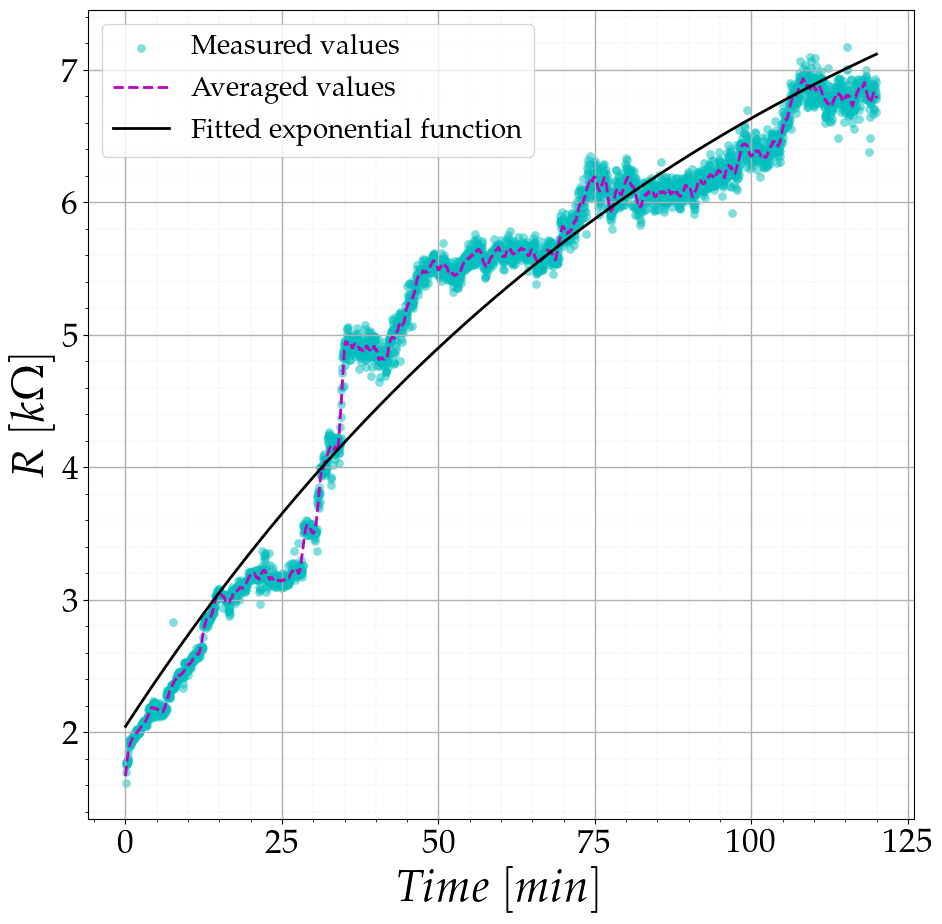

In [22]:
plt.figure(figsize=(10, 10))
data["G"] = 1/data.R
R_filtered = savgol_filter(data.R, 51,3)
plt.scatter(data.time/60,data.R, color='c', linewidths=0.2,alpha=0.5,label="Measured values")
plt.plot(data.time/60,  R_filtered,'m--',linewidth=2,label="Averaged values")
plt.ylabel("$R\ [k\Omega]$")
plt.xlabel("$Time\ [min]$")


m = GEKKO()
R = data.R.to_numpy()
t = data.time.to_numpy()
x = m.Param(value= t)
R_on = m.FV(value = 6)
R_off = m.FV(value = 1)
tau = m.FV(value = 8000, lb=6000)

R_on.STATUS = 1
R_off.STATUS = 1
tau.STATUS = 1

y = m.CV(value = R)
y.FSTATUS = 1
m.options.EV_TYPE = 2
m.Equation(y == R_on  -  (R_on-R_off) * m.exp(-1*x/tau))
m.options.IMODE = 2
m.solve(disp=False)

plt.plot(np.array(x.value)/60,y.value,'k-',label="Fitted exponential function",linewidth=2)
ax = plt.gca()
#ax.ticklabel_format(axis = 'y', style = 'sci')

ax.grid(which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.2, linestyle='dashed',alpha = 0.5)
ax.minorticks_on()
plt.xticks(fontsize= 24)
plt.yticks(fontsize= 24)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.savefig("Rezystancja.pdf",bbox_inches='tight')

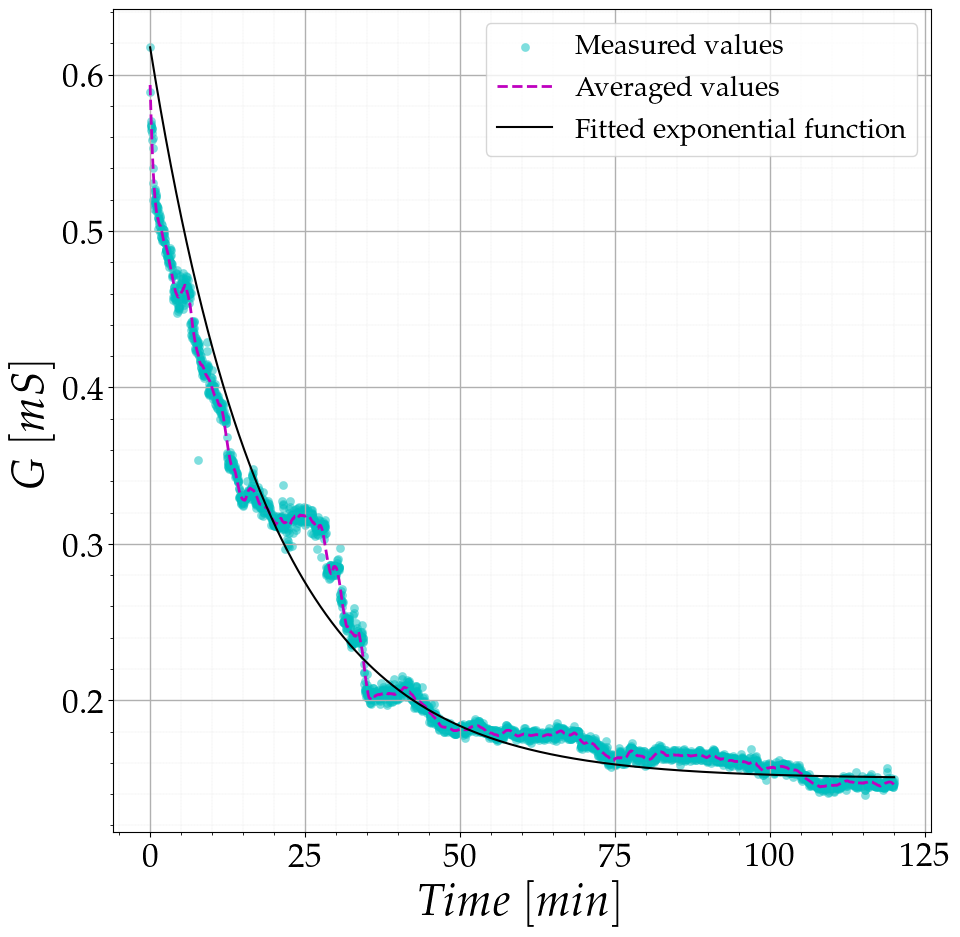

In [25]:
plt.figure(figsize=(10, 10))
data["G"] = 1/data.R
G_filtered = savgol_filter(data.G, 71,3)
cmap = plt.get_cmap('gist_rainbow')
plt.set_cmap(cmap)

plt.scatter(data.time/60,data.G,color = 'c',linewidths=0.2,alpha=0.5,label="Measured values")
plt.plot(data.time/60,  G_filtered,'m--',linewidth=2,label="Averaged values")
plt.ylabel("$G\ [mS]$")
plt.xlabel("$Time\ [min]$")





m = GEKKO()
G = data.G.to_numpy()
t = data.time.to_numpy()
x = m.Param(value= t)
G_on = m.FV(value = 0.0,lb = 0.0, ub = 0.15)
G_off = m.FV(value = 0.7,lb=np.max(G),ub = 1)
tau = m.FV(value = 1000)
tau2 = m.FV(value = 1)
G_on.STATUS = 1
G_off.STATUS = 1
tau.STATUS = 1
tau2.STATUS = 1
y = m.CV(value = G)
y.FSTATUS = 1
m.options.EV_TYPE = 2
m.Equation(y == G_on  -  (G_on-G_off) * m.exp(-1*x/tau) - (G_on-G_off) * m.exp(-1*x/tau2) )
m.options.IMODE = 2
m.solve(disp=False)

plt.plot(np.array(x.value)/60,y.value,'k-',label="Fitted exponential function")


plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.legend()
plt.tight_layout()
plt.grid(True)
ax = plt.gca()
#ax.ticklabel_format(axis = 'y', style = 'sci')
plt.xticks(fontsize= 24)
plt.yticks(fontsize= 24)
ax.grid(which = "major", linewidth = 1)
ax.grid(which = "minor", linewidth = 0.2, linestyle='dashed',alpha = 0.5)
ax.minorticks_on()
plt.savefig("Konduktancja.pdf",bbox_inches='tight')



In [17]:
np.array(  x.value)

array([1.10965710e+00, 3.22676150e+00, 5.33368250e+00, ...,
       7.19511104e+03, 7.19721422e+03, 7.19932731e+03])